# Tutorial 4
# Linear Models

In [1]:
%matplotlib inline
from preamble import *

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Predictions of a linear model on the wave dataset

w[0]: 0.393906  b: -0.031804


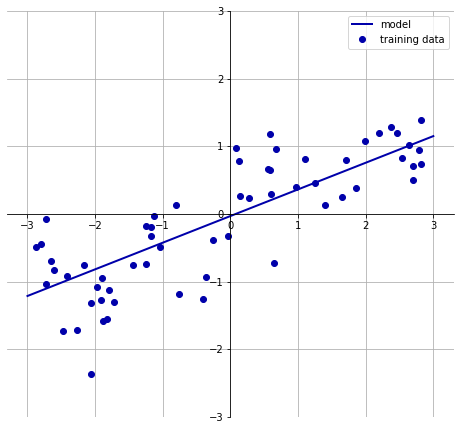

In [2]:
# plot regression line based on the wave dataset
mglearn.plots.plot_linear_regression_wave()

In [3]:
# import the libraries for LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
# X and y are the array variables that store the independent and dependent variables
X, y = mglearn.datasets.make_wave(n_samples = 60)

# Call the train_test_split method to split the data and the default splitting is 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Train the LinearRegression mode by using a method fit() function/ method
lr = LinearRegression().fit(X_train, y_train)

In [6]:
# Display the coefficient and intercept values
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [7]:
# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


#### As R^2 of around 0.66 is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting.
#### For this one-dimensional dataset, there is little danger of overfitting, as the model is very simple (or restricted). However, with higher-dimensional datasets (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting.

In [8]:
# Store and load the dataset 
X, y = mglearn.datasets.load_extended_boston()
X.shape, y.shape

((506, 104), (506,))

In [11]:
# Split the dataset by using train_test_splitting to 25% and 75% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Use LinearRegression() model to train the data
lr = LinearRegression().fit(X_train, y_train)

In [12]:
# Display the score using format function
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
# OVERFITTED MODEL

Training set score: 0.95
Test set score: 0.61


## Ridge regression

In [10]:
from sklearn.linear_model import Ridge

# Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [11]:
# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [12]:
# alpha = 0.1 is a parameter using a fit() method
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


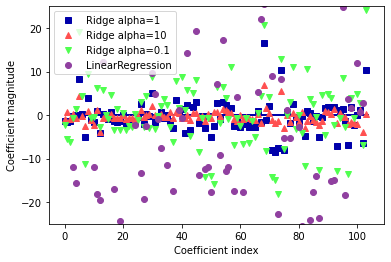

In [13]:
# Use plot function for different labels
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

# Use x and y labels for the plot
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

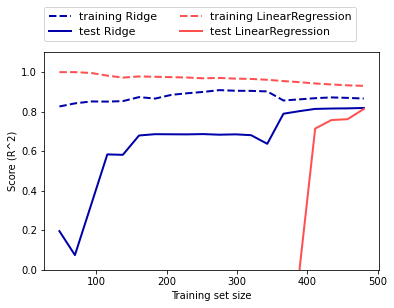

In [14]:
# Display the training and testing for the Linear and Ridge regression
mglearn.plots.plot_ridge_n_samples()

### Lasso Regression

In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [16]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [17]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

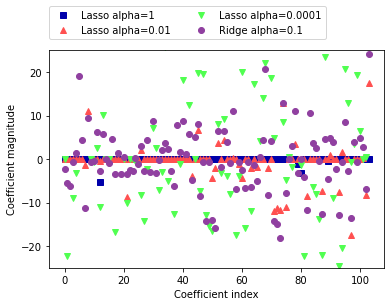

In [18]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

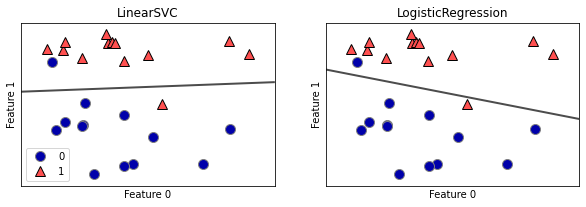

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

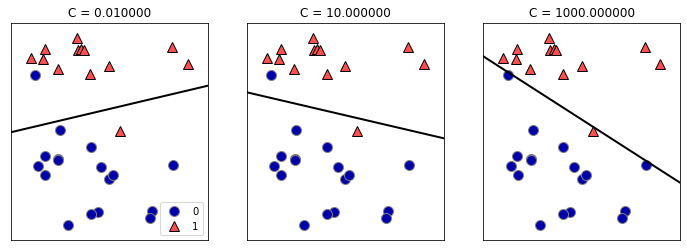

In [21]:
mglearn.plots.plot_linear_svc_regularization()

# Cross-Validation: A Quick Recap
The following figure illustrates k-fold cross-validation with k=4. There are some other schemes to divide the training set, we'll look at them briefly later.

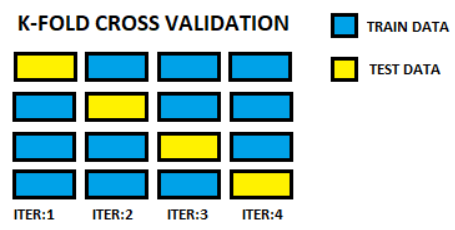

In [22]:
from IPython.display import Image
Image(filename =r'Im1.png')

In [23]:
# Store and load the dataset 
X, y = mglearn.datasets.load_extended_boston()

# Split the dataset by using train_test_splitting to 25% and 75% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Use LinearRegression() model to train the data
lr = LinearRegression().fit(X_train, y_train)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# k-fold CV (using all variables)
scores = cross_val_score(lr, X_train, y_train, scoring = 'r2', cv = 10)
print(scores)

[0.926 0.812 0.759 0.634 0.606 0.357 0.806 0.886 0.918 0.934]


### Reference: 
- Chapter 2, Introduction to Machine Learning with Python A Guide for Data Scientists, Andreas C. Müller and Sarah Guido, Copyright © 2017, O'Reilly.
- https://www.kaggle.com/